In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from protrend.utils import Settings

In [ ]:
import json
from pathlib import Path
from typing import Union


def read_report(file_path: Union[str, Path]) -> dict:
    """
    It reads the report
    """
    with open(file_path, 'r') as f:
        report = json.load(f)

    return report

In [3]:
entities = ('effector',
            'evidence',
            'gene',
            'motif',
            'operon',
            'organism',
            'pathway',
            'publication',
            'regulator',
            'regulatoryfamily',
            'regulatoryinteraction',
            'source',
            'tfbs')

In [4]:
last_report_fp = Path(Settings.report_working_directory).joinpath('protrend_report_2022_08_16_15_24_11.json')

report = read_report(last_report_fp)
report

{'collectf_0.0.1_transform_evidence': {'source': 'collectf',
  'version': '0.0.1',
  'system': 'transform',
  'label': 'evidence',
  'objects': 56,
  'properties': 5},
 'collectf_0.0.1_integrate_evidence': {'source': 'collectf',
  'version': '0.0.1',
  'system': 'integrate',
  'label': 'evidence',
  'objects': 56,
  'properties': 9},
 'collectf_0.0.1_extract_organism': {'source': 'collectf',
  'version': '0.0.1',
  'system': 'extract',
  'label': 'organism',
  'objects': 153,
  'properties': 7},
 'collectf_0.0.1_transform_organism': {'source': 'collectf',
  'version': '0.0.1',
  'system': 'transform',
  'label': 'organism',
  'objects': 155,
  'properties': 14},
 'collectf_0.0.1_integrate_organism': {'source': 'collectf',
  'version': '0.0.1',
  'system': 'integrate',
  'label': 'organism',
  'objects': 153,
  'properties': 19},
 'collectf_0.0.1_transform_publication': {'source': 'collectf',
  'version': '0.0.1',
  'system': 'transform',
  'label': 'publication',
  'objects': 526,
  'p

In [5]:
df = pd.DataFrame(list(report.values()))
df

,source,version,system,label,objects,properties,source_label,target_label,relationships
0,collectf,0.0.1,transform,evidence,56.0,5.0,NaN,NaN,NaN
1,collectf,0.0.1,integrate,evidence,56.0,9.0,NaN,NaN,NaN
2,collectf,0.0.1,extract,organism,153.0,7.0,NaN,NaN,NaN
3,collectf,0.0.1,transform,organism,155.0,14.0,NaN,NaN,NaN
4,collectf,0.0.1,integrate,organism,153.0,19.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
373,standardizer,0.0.0,integrate,regulatoryinteraction,0.0,1.0,NaN,NaN,NaN
374,standardizer,0.0.0,transform,evidence,104.0,1.0,NaN,NaN,NaN
375,standardizer,0.0.0,integrate,evidence,104.0,1.0,NaN,NaN,NaN
376,standardizer,0.0.0,transform,publication,16344.0,1.0,NaN,NaN,NaN


In [8]:
df_pivot = pd.pivot_table(df, values='objects', index=['source', 'system'], columns=['label'], aggfunc=sum)
df_pivot = df_pivot.reindex(['extract', 'transform', 'integrate', 'load'], level='system')
df_pivot = df_pivot.fillna('-')
df_pivot_integrate = df_pivot.loc[:, ['load'], :].reindex(['load'], level='system')
df_pivot_integrate.index = df_pivot_integrate.index.set_levels(['integrate'], level='system')
df_pivot.loc[:, ['integrate'], :] = df_pivot_integrate
df_pivot = df_pivot.drop(columns=['integrate'])
df_pivot

label                  effector evidence      gene    motif     operon  \
source       system                                                      
abasy        extract          -        -   11662.0        -          -   
             transform        -        -   11544.0        -          -   
             integrate        -        -    9335.0        -          -   
             load             -        -    9335.0        -          -   
collectf     extract          -        -    1980.0        -          -   
             transform        -     56.0    1976.0        -          -   
             integrate        -     56.0    1976.0        -          -   
             load             -     56.0    1976.0        -          -   
coryneregnet extract          -        -    3921.0        -          -   
             transform        -      3.0    3881.0        -          -   
             integrate        -      3.0     414.0        -          -   
             load             -      3.0     414.0        -          -   
dbtbs        extract          -        -     682.0        -          -   
             transform        -        -     682.0        -          -   
             integrate        -        -      16.0        -          -   
             load             -        -      16.0        -          -   
literature   extract      140.0        -    4859.0        -          -   
             transform    140.0        -    4859.0        -          -   
             integrate     90.0        -     615.0        -          -   
             load          90.0        -     615.0        -          -   
motif        transform        -        -         -  80105.0          -   
             integrate        -        -         -  15643.0          -   
             load             -        -         -  15643.0          -   
operondb     extract          -        -         -        -  6135320.0   
             transform        -        -   13189.0        -    24677.0   
             integrate        -        -     565.0        -    24677.0   
             load             -        -     565.0        -    24677.0   
regprecise   extract      308.0        -   15281.0        -          -   
             transform    308.0        -  102318.0        -          -   
             integrate    308.0        -  101503.0        -          -   
             load         308.0        -  101503.0        -          -   
regulondb    extract      137.0        -    4168.0        -          -   
             transform    137.0    127.0    4085.0        -          -   
             integrate    103.0    123.0    1560.0        -          -   
             load         103.0    123.0    1560.0        -          -   
standardizer transform     69.0    104.0    3445.0        -        0.0   
             integrate      NaN      NaN       NaN      NaN        NaN   

label                  organism pathway publication regulator  \
source       system                                             
abasy        extract        9.0       -           -     708.0   
             transform      9.0       -           -     708.0   
             integrate      3.0       -           -     526.0   
             load           3.0       -           -     526.0   
collectf     extract      153.0       -           -     342.0   
             transform    155.0       -       526.0     236.0   
             integrate    153.0       -       526.0     230.0   
             load         153.0       -       526.0     230.0   
coryneregnet extract          -       -           -     539.0   
             transform      4.0       -       465.0     538.0   
             integrate        -       -       441.0     168.0   
             load             -       -       441.0     168.0   
dbtbs        extract          -       -           -     109.0   
             transform      1.0       -       819.0     109.0   
             integrate        -       -       462.0         -   
        

In [44]:
df_st = df_pivot.loc[('standardizer', 'transform'),:]
df_st = df_st.to_frame().transpose().reset_index(drop=True)
df_st = df_st.rename(columns={'regulatoryfamily': 'regulatory family', 'regulatoryinteraction': 'regulatory interaction'})
df_st

label,effector,evidence,gene,motif,operon,organism,pathway,publication,regulator,regulatory family,regulatory interaction,source,tfbs
0,69.0,104.0,3445.0,-,0.0,80.0,1.0,16344.0,199.0,151.0,0.0,1.0,2750.0


In [46]:
from protrend.utils import NeoDatabase
from protrend.model import *

# connect to database
neo_db = NeoDatabase(user_name=Settings.db_user_name, password=Settings.db_password,
                     ip=Settings.db_ip, port=Settings.db_port)
neo_db.connect()

nodes = {
    'effector': Effector,
    'evidence': Evidence,
    'gene': Gene,
    'motif': Motif,
    'operon': Operon,
    'organism': Organism,
    'pathway': Pathway,
    'publication': Publication,
    'regulator': Regulator,
    'regulatory family': RegulatoryFamily,
    'regulatory interaction': RegulatoryInteraction,
    'source': Source,
    'tfbs': TFBS,
}

short_report = {}

for name, node in nodes.items():
    short_report[name] = [len(node.nodes)]

short_report = pd.DataFrame(short_report)

short_report = short_report.to_frame().transpose()
short_report

,effector,evidence,gene,motif,operon,organism,pathway,publication,regulator,regulatory family,regulatory interaction,source,tfbs
0,432,78,112478,15643,24677,536,286,2078,15978,52,210840,11,79910


In [72]:
data_st = pd.concat([short_report, df_st])
data_st = data_st.drop(columns=['source', 'regulatory interaction'])
data_st = data_st.replace({'-': 0}).reset_index(drop=True).rename(index={0: 'standardized', 1: 'no standardization'})
data_st = data_st.transpose()
data_st['no standardization'] = data_st['standardized'] + data_st['no standardization']
data_st

,standardized,no standardization
effector,432.0,501.0
evidence,78.0,182.0
gene,112478.0,115923.0
motif,15643.0,15643.0
operon,24677.0,24677.0
organism,536.0,616.0
pathway,286.0,287.0
publication,2078.0,18422.0
regulator,15978.0,16177.0
regulatory family,52.0,203.0


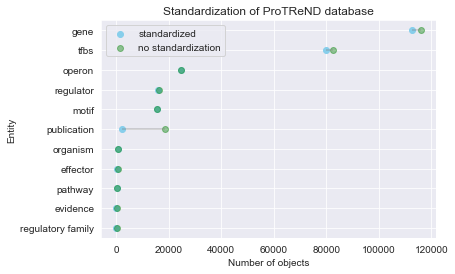

In [73]:
# Reorder it following the values of the first value:
ordered_data_st = data_st.sort_values(by='standardized')
my_range = range(1,len(ordered_data_st.index)+1)

# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=ordered_data_st['standardized'], xmax=ordered_data_st['no standardization'],
           color='grey', alpha=0.4)
plt.scatter(ordered_data_st['standardized'], my_range, color='skyblue', alpha=1, label='standardized')
plt.scatter(ordered_data_st['no standardization'], my_range, color='green', alpha=0.4 , label='no standardization')
plt.legend()

# Add title and axis names
plt.yticks(my_range, ordered_data_st.index)
plt.title("Standardization of ProTReND database")
plt.xlabel('Number of objects')
plt.ylabel('Entity')

# Show the graph
plt.savefig("standardization_report.png", bbox_inches="tight", dpi=150)
plt.show()

In [9]:
df_integration = pd.read_excel('./integration_report.xlsx')
df_integration = df_integration.dropna(subset=['System'])
df_integration = df_integration.set_index('Source')
df_integration = df_integration.drop(index=['ODB'])
df_integration = df_integration.replace({'-': None, 'extract': 'E', 'transform': 'T', 'integrate': 'I', 'load': 'L'})
df_integration

,System,Effector,Evidence,Gene,Operon,Organism,Pathway,Publication,Regulator,R. Fam,Interaction,TFBS
Source,,,,,,,,,,,,
Abasy,E,NaN,NaN,11662.0,None,9,NaN,NaN,708,NaN,NaN,NaN
Abasy,T,NaN,NaN,11544.0,None,9,NaN,NaN,708,NaN,11334.0,NaN
Abasy,I,NaN,NaN,9335.0,None,3,NaN,NaN,526,NaN,11331.0,NaN
Abasy,L,NaN,NaN,9335.0,None,3,NaN,NaN,526,NaN,11331.0,NaN
CollecTF,E,NaN,56.0,1980.0,None,153,NaN,526.0,342,NaN,NaN,3649.0
CollecTF,T,NaN,56.0,1976.0,None,153,NaN,526.0,236,NaN,2539.0,3579.0
CollecTF,I,NaN,56.0,1976.0,None,153,NaN,526.0,230,NaN,2539.0,3579.0
CollecTF,L,NaN,56.0,1976.0,None,153,NaN,526.0,230,NaN,2539.0,3579.0
CoryneRegNet,E,NaN,3.0,3921.0,None,4,NaN,465.0,539,NaN,NaN,4841.0


In [10]:
data = df_integration.reset_index(drop=False)
src_order = ['CollecTF', 'RegPrecise', 'Abasy', 'CoryneRegNet', 'Literature', 'DBTBS', 'RegulonDB']
system_order = ['E', 'T', 'I', 'L']

data['Source'] = pd.Categorical(data['Source'], src_order)
data['System'] = pd.Categorical(data['System'], system_order)
data = data.sort_values(['Source', 'System'])
data

,Source,System,Effector,Evidence,Gene,Operon,Organism,Pathway,Publication,Regulator,R. Fam,Interaction,TFBS
4,CollecTF,E,NaN,56.0,1980.0,None,153,NaN,526.0,342,NaN,NaN,3649.0
5,CollecTF,T,NaN,56.0,1976.0,None,153,NaN,526.0,236,NaN,2539.0,3579.0
6,CollecTF,I,NaN,56.0,1976.0,None,153,NaN,526.0,230,NaN,2539.0,3579.0
7,CollecTF,L,NaN,56.0,1976.0,None,153,NaN,526.0,230,NaN,2539.0,3579.0
20,RegPrecise,E,308.0,NaN,102318.0,None,524,287.0,311.0,15432,171.0,NaN,68114.0
21,RegPrecise,T,308.0,NaN,102318.0,None,524,287.0,311.0,15314,171.0,171188.0,67581.0
22,RegPrecise,I,308.0,NaN,101503.0,None,460,287.0,299.0,15224,171.0,171188.0,67581.0
23,RegPrecise,L,308.0,NaN,101503.0,None,460,287.0,299.0,15224,171.0,171188.0,67581.0
0,Abasy,E,NaN,NaN,11662.0,None,9,NaN,NaN,708,NaN,NaN,NaN
1,Abasy,T,NaN,NaN,11544.0,None,9,NaN,NaN,708,NaN,11334.0,NaN


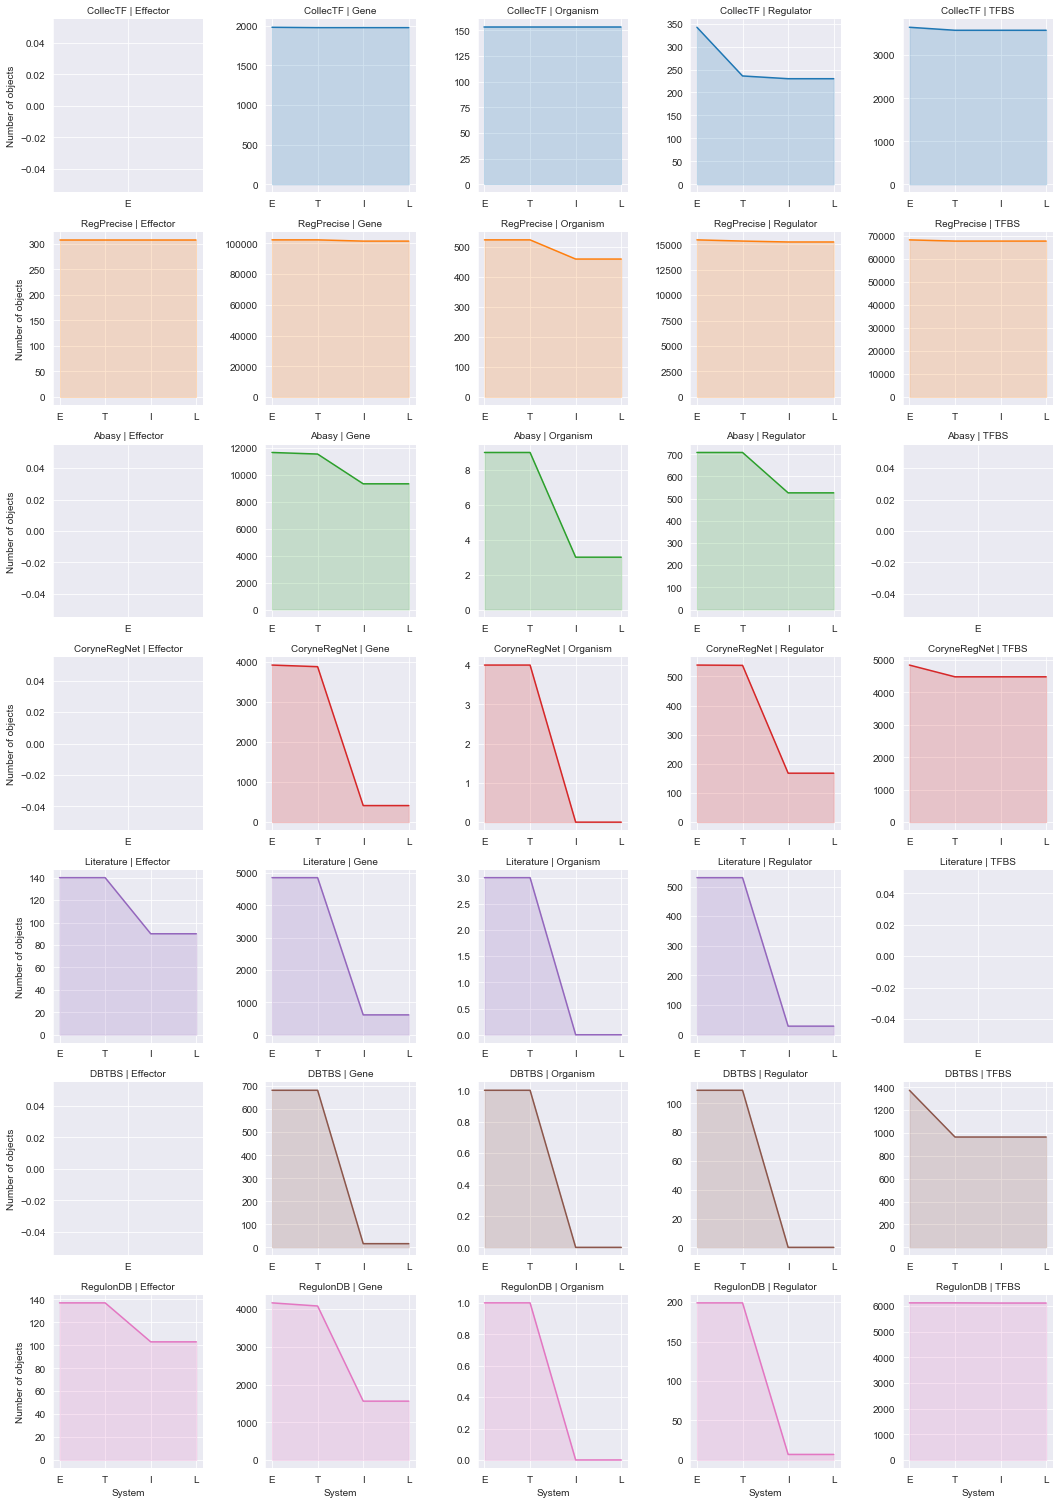

In [24]:
sub_set = data[['Effector', 'Gene', 'Organism', 'Regulator', 'TFBS', 'Source', 'System']]
sub_set = pd.melt(sub_set, id_vars=['Source', 'System'], value_vars=['Effector', 'Gene', 'Organism', 'Regulator', 'TFBS'],
                  var_name='Object', value_name='Value')

# Create a grid : initialize it
g = sns.FacetGrid(sub_set, col='Object', row='Source', hue='Source', sharex=False, sharey=False)

# Add the line over the area with the plot function
g = g.map(plt.plot, 'System', 'Value')

# Fill the area with fill_between
g = g.map(plt.fill_between, 'System', 'Value', alpha=0.2).set_titles("{col_name} source")

# Control the title of each facet
g = g.set_titles(col_template="{col_name}", row_template="{row_name}")
g = g.set_ylabels('Number of objects')

# Save & show the graph
plt.savefig("integration_report.png", bbox_inches="tight", dpi=150)
plt.show()